In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuromodes.io import fetch_surf, fetch_map
from neuromodes.eigen import EigenSolver
from nsbutils.utils import unmask
from nsbutils.plotting import plot_surf
from importlib.resources import files

# Load cortical surface mesh
mesh, medmask = fetch_surf()
myelinmap = fetch_map('myelinmap')
saaxis = fetch_map('fcgradient1')
lh_surfpath = files('neuromodes.data') / 'sp-human_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'

n_modes = 200

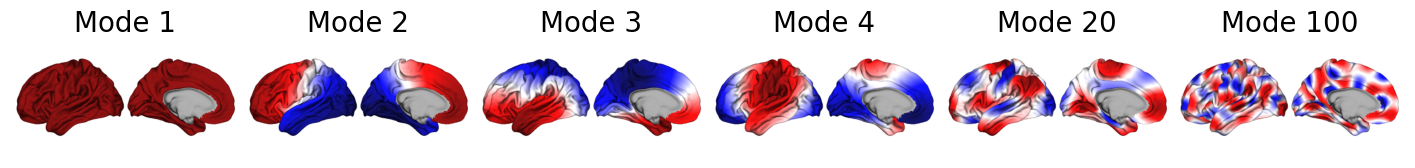

In [2]:
# Initialize solver with surface
solver0 = EigenSolver(mesh, mask=medmask, hetero=None, aniso=None)
solver0.solve(n_modes=n_modes)
plot_surf(lh_surfpath, unmask(solver0.emodes[:,[0,1,2,3,19,99]], medmask), labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 4', 'Mode 20', 'Mode 100'], cmap='seismic_r')

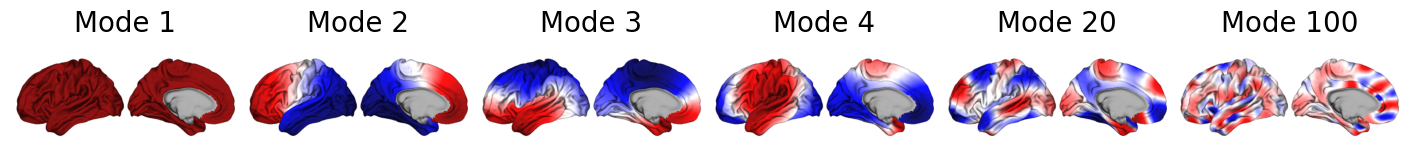

In [3]:
# Initialize solver with surface
solver1 = EigenSolver(mesh, mask=medmask, hetero=myelinmap, aniso=None, 
                      alpha=1)
solver1.solve(n_modes=n_modes)
plot_surf(lh_surfpath, unmask(solver1.emodes[:,[0,1,2,3,19,99]], medmask), labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 4', 'Mode 20', 'Mode 100'], cmap='seismic_r')

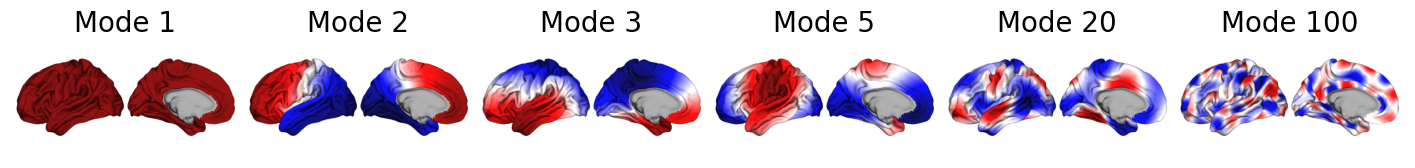

In [4]:
# Initialize solver with surface
solver2 = EigenSolver(mesh, mask=medmask, hetero=None, aniso=saaxis, beta=10)
solver2.solve(n_modes=n_modes)
plot_surf(lh_surfpath, unmask(solver2.emodes[:,[0,1,2,3,19,99]], medmask), labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 5', 'Mode 20', 'Mode 100'], cmap='seismic_r')

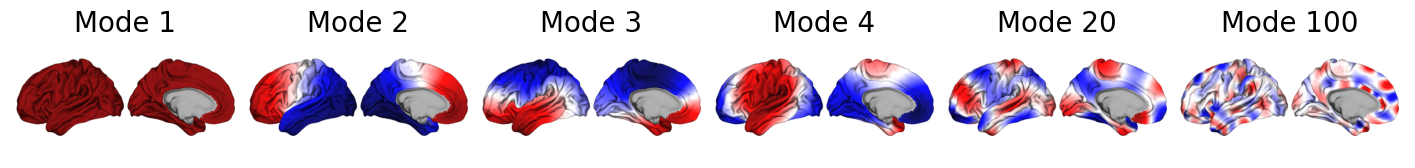

In [5]:
# Initialize solver with surface
solver3 = EigenSolver(mesh, mask=medmask, hetero=myelinmap, aniso=saaxis, alpha=1, beta=10)
solver3.solve(n_modes=n_modes)
plot_surf(lh_surfpath, unmask(solver3.emodes[:,[0,1,2,3,19,99]], medmask), labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 4', 'Mode 20', 'Mode 100'], cmap='seismic_r')

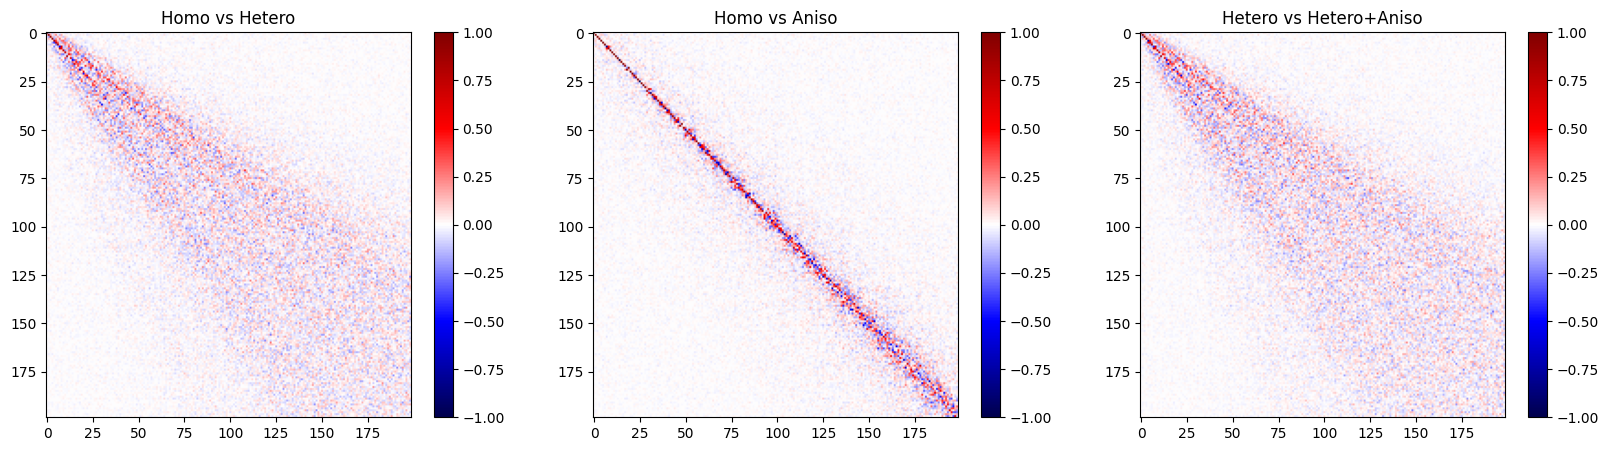

In [6]:
emodes_corrs_01 = np.corrcoef(solver0.emodes[:, 1:].T, solver1.emodes[:, 1:].T)[:199, 199:]
emodes_corrs_02 = np.corrcoef(solver0.emodes[:, 1:].T, solver2.emodes[:, 1:].T)[:199, 199:]
emodes_corrs_03 = np.corrcoef(solver0.emodes[:, 1:].T, solver3.emodes[:, 1:].T)[:199, 199:]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

im0 = axs[0].imshow(emodes_corrs_01, cmap='seismic', vmin=-1, vmax=1, aspect='auto')
axs[0].set_title('Homo vs Hetero')
plt.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(emodes_corrs_02, cmap='seismic', vmin=-1, vmax=1, aspect='auto')
axs[1].set_title('Homo vs Aniso')
plt.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(emodes_corrs_03, cmap='seismic', vmin=-1, vmax=1, aspect='auto')
axs[2].set_title('Hetero vs Hetero+Aniso')
plt.colorbar(im2, ax=axs[2])

plt.show()

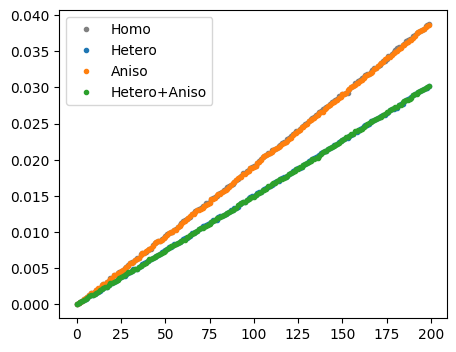

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.plot(solver0.evals, '.', label='Homo', c='grey')
ax.plot(solver1.evals, '.', label='Hetero')
ax.plot(solver2.evals, '.', label='Aniso')
ax.plot(solver3.evals, '.', label='Hetero+Aniso')

plt.legend()
plt.show()